<a href="https://colab.research.google.com/github/mths-miranda/data_science/blob/master/COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Sigmoidal logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

**Data Science na Prática 3.0**

*by [sigmoidal.ai](https://sigmoidal.ai)*

*Author: [Matheus Miranda](https://www.linkedin.com/in/engenheiromatheusmiranda/)*, August 2022.

---
<center><img alt="Covid 19" width="60%" src="https://github.com/mths-miranda/data_science/blob/master/img/covid19_starline_freepik.jpg?raw=true"></center>

<center><a href="http://www.freepik.com">Designed by starline / Freepik</a> </center>


O Coronavirus (COVID-19) é uma doença infecciosa causada pelo vírus SARS-CoV-2.

De acordo com a [World Health Organization (WHO)](https://www.who.int/health-topics/coronavirus#tab=tab_1), a maioria da pessoas infectadas pelo vírus irá passar por doenças respirátorias brandas ou moderadas e irão se recuperar sem precisar de tratamento especial. No entanto, como todos já tiveram oportunidades de constatar nesses últimos anos, alguns casos ficarão gravemente doentes, o que requer cuidados médicos específicos. Algumas pessoas com condições como cancêr, doenças cardiovasculares, diabetes, sobrepeso, são mais propensos a evoluirem para doenças graves. Qualquer um pode adoecer de Covid, ficar gravemente doente ou morrer, em qualquer idade.

##Você sabia?

O nome Covid é a junção de letras que se referem a **co**-rona **vi**-rus **d** -isease, em português: "doença do coronavírus". Já o número 19 se refere ao ano de 2019, quando os primeiros casos foram publicamente divulgados.

Fonte: [Portal Fiocruz](https://portal.fiocruz.br/)

##Panorama do Covid

Com intuito de elevar a consciênica sobre o Covid no Brasil e no Mundo e reconhecer o atual cenário da pandemia, irei fazer uma análise sobre dados públicos da doença.

##Obtenção de dados

Os dados que utilizo nesse projeto são fornecidos pela iniciativa [Our World in Data (OWiD)](https://ourworldindata.org/), que é uma fundação fruto da parceria entre pesquisadores da Universidade de Oxford e a organização sem fins lucrativos [Global Change Data Lab](https://global-change-data-lab.org/).

O [OWiD]((https://ourworldindata.org/) reúne e organiza dados sobre grandes temas do mundo como a pobreza, doenças, fome, mudanças climáticas, guerra, riscos existenciais e desigualdade. O objetivo do trabalho da organização, assim como eles citam em sua página, é publicar "pequisas e dados para progredir contra os maiores problemas do mundo". 

Os dados sobre o Covid-19 são atualizados diariamente (enquanto persistir a pandemia), e disponibilizados em seu repositório no [GitHub](https://github.com/owid/covid-19-data/tree/master/public/data). Nesse projeto, a conexão com a fonte de dados é online, logo, alguma conclusão tomada nessa data, pode não ser mais coerente em um cenário futuro.

*Data da análise: 07 de Agosto de 2022.*

In [97]:
#instalando bibliotecas
!pip install bar_chart_race -q

In [98]:
#importando os pacotes necessários
import pandas as pd
from pandas.io.formats.info import DataFrameInfo

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

import seaborn as sns
import bar_chart_race as bcr
import numpy as np

In [99]:
#importando os dados para um dataframe
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

##Análisando os dados

As variáveis que compõem os dados coletados e fornecidos pela OWiD, que estou aplicando nesse *dataset*, trazem informações principalmente sobre os casos confirmados, mortes, hospitalizações e testes. Também há diversas outras informações que podem ser úteis na nossa exploração.

**Dicionário de Variáveis**

Para reconhecer melhor o *dataset*, vou listar aqui as variáveis que iremos encontrar. Esse dicionário de variáveis mais completo você encontra no [repósitorio do OWiD]('https://github.com/owid/covid-19-data/tree/master/public/data').

* `aged_65_older`: parcela da população com 65 anos ou mais.
* `aged_70_older`: parcela da população com 70 anos ou mais, em 2015.
* `cardiovasc_death_rate`: taxa de mortalidade por doença cardiovascular em 2017 (número anual de mortes por 100 mil pessoas).
* `continent`: continente da localização geográfica.
* `date`: data do registro.
* `diabetes_prevalence`: prevalência de diabetes (% da população de 20 a 79 anos) em 2017.
* `excess_mortality_cumulative_absolute`: diferença cumulativa entre o número de mortes desde 01/01/2020 e o número projetado de mortes para o mesmo período com base em anos anteriores.
* `excess_mortality_cumulative_per_million`: diferença cumulativa entre o número de mortes desde 01/01/2020 e o número projetado de mortes para o mesmo período com base em anos anteriores, por 1 milhão de pessoas.
* `excess_mortality_cumulative`: diferença (percentual) entre número acumulado de mortes desde 01/01/2022 e mortes cumulativas projetadas para o mesmo período com base em anos anteriores. 
* `excess_mortality`: diferença (percentual) entre mortes registradas (semanal ou mensal) em 2020-2021 versus o número de mortes projetadas para o mesmo período com base em anos anteriores.
* `extreme_poverty`: parcela da população que vive em pobreza extrema.
* `female_smokers`: parcela de mulheres que fumam.
* `gdp_per_capita`: Produto Interno Bruto (PIB) comparado ao poder de compra.
* `handwashing_facilities`: parcela da população que possui instalações básicas que permitam lavar as mãos.
* `hosp_patients_per_million`: número de pacientes com Covid-19 em hospitais por 1 milhão de pessoas.
* `hosp_patients`: número de pacientes com Covid-19 em hospitais.
* `hospital_beds_per_thousand`: camas hospitalares, por 1 mil pessoas.
* `human_development_index`: índice que mede o desempenho médio em três dimensões do desenvolvimento humano: uma vida longa e saudável, conhecimento e um padrão de vida decente.
* `icu_patients_per_million`: número de pacientes com Covid-19 em UTI's por 1 milhão de pessoas.
* `icu_patients`: número de pacientes com Covid-19 em UTI's.
* `iso_code`: código ISO dos países (3 letras).
* `life_expectancy`: expectativa de vida, para nascidos em 2019.
* `location`: localização geográfica.
* `male_smokers`: parcela de homens que fumam.
* `median_age`: idade média da população.
* `new_cases_per_million`: novos casos por 1 milhão de pessoas.
* `new_cases_smoothed_per_million`: novos casos (suavizadas 7 dias) por 1 milhão de pessoas.
* `new_cases_smoothed`: novos casos de Covid-19, suavizadas 7 dias.
* `new_cases`: novos casos de Covid-19.
* `new_deaths_per_million`: novas mortes por 1 milhão de pessoas.
* `new_deaths_smoothed_per_million`: novas mortes (suavizadas 7 dias) por 1 milhão de pessoas.
* `new_deaths_smoothed`: novas mortes por Covid-19 (suavizadas 7 dias).
* `new_deaths`: novas mortes por Covid-19.
* `new_people_vaccinated_smoothed_per_hundred`: número diário de pessoas que recebem a primeira dose (suavizado de 7 dias), por 100 pessoas.
* `new_people_vaccinated_smoothed`: número diário de pessoas que recebem a primeira dose.
* `new_tests_per_thousand`: número de novos testes para Covid-19, para 1 mil pessoas.
* `new_tests_smoothed_per_thousand`: número de novos testes para Covid-19, suavizado de 7 dias, por 1 mil pessoas.
* `new_tests_smoothed`: número de novos testes para Covid-19, suavizado de 7 dias.
* `new_tests`: número de novos testes para Covid-19.
* `new_vaccinations_smoothed_per_million`: novas doses aplicadas (suavizadas de 7 dias) por 1 milhão de pessoas.
* `new_vaccinations_smoothed`: novas doses aplicadas (suavizadas de 7 dias).
* `new_vaccinations`: novas doses aplicadas. 
* `people_fully_vaccinated_per_hundred`: número de pessoas que receberam todas as doses recomendadas, por 100 pessoas da população total.
* `people_fully_vaccinated`: número de pessoas que receberam todas as doses recomendadas.
* `people_vaccinated_per_hundred`: total de pessoas que receberam pelo menos 1 dose por 100 pessoas da população total.
* `people_vaccinated`: número de pessoas que foram vacinadas (pelo menos 1 dose).
* `population_density`: densidade populacional (por Km²).
* `population`: população.
* `positive_rate`: parcela de testes COVID-19 positivos, dada como uma média contínua de 7 dias (este é o inverso de tests_per_case).
* `reproduction_rate`: estivamativa em tempo real de reprodução do Covid-19.
* `stringency_index`: Índice de Rigidez da Resposta do Governo: medida composta com base em 9 indicadores de resposta, incluindo fechamento de escolas, fechamento de locais de trabalho e proibição de viagens, reescalonado para um valor de 0 a 100 (100 = resposta mais rigorosa)
* `tests_per_case`: testes realizados por novo caso confirmado de COVID-19, dados como uma média contínua de 7 dias (este é o inverso de positive_rate).
* `tests_units`: unidade usadas pelo local para relatar seus dados de teste.
* `total_boosters_per_hundred`: total de doses de reforço (além do recomendado) por 100 pessoas da população total.
* `total_boosters`: número total de doses de reforço, aplicadas além das doses recomendadas.
* `total_cases_per_million`: total de casos confirmados por 1 milhão de pessoas.
* `total_cases`: total de casos confirmados de Covid-19.
* `total_deaths_per_million`: total de mortes por 1 milhão de pessoas.
* `total_deaths`: total de mortes registradas por Covid-19.
* `total_tests_per_thousand`: número total de testes para Covid-19, para 1 mil pessoas.
* `total_tests`: número total de testes para Covid-19.
* `total_vaccinations_per_hundred`: número de doses aplicadas por 100 pessoas da população total.
* `total_vaccinations`: número total de doses de vacina aplicadas.
* `weekly_hosp_admissions_per_million`: número de pacientes com Covid-19 recém adimitidos (última semana) em hospitais, por 1 milhão de pessoas.
* `weekly_hosp_admissions`:  número de pacientes com Covid-19 recém adimitidos (última semana) em hospitais.
* `weekly_icu_admissions_per_million`: número de pacientes com Covid-19 recém adimitidos (última semana) em UTI's, por 1 milhão de pessoas.
* `weekly_icu_admissions`: número de pacientes com Covid-19 recém adimitidos (6 dias) em UTI's.

**Dimensões do DataFrame**

O nosso *DataFrame* tem atualmente 67 variáveis. As entradas são atualizadas diariamente, e já contabilizam mais de 206 mil registros.

In [100]:
#identificar o tamanho do DataFrame
print("\nVariáveis do DataFrame: {}".format(df.shape[1]),
      "\nNúmero de entradas: {}".format(df.shape[0]))


Variáveis do DataFrame: 67 
Número de entradas: 206844


In [101]:
#identificar as 5 primeiras entradas do DataFrame
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

Como você pode ter observado, eu mostrei que o *DataFrame* possui 67 variáveis, porém, ao visualizar as 5 primeiras entradas, a biblioteca `pandas` tem um limite de exibição de 20 variáveis.

Vamos identificar as variáveis e também o tipo (`type`) de cada uma delas. Nessa identificação, vou também ordenar as variávéis que mais possuem entradas não vazias (não são valores ausentes).

In [102]:
#identificar os tipos das colunas
df[df.notna().sum().sort_values(ascending=False).index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206844 entries, 0 to 206843
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    206844 non-null  object 
 1   location                                    206844 non-null  object 
 2   date                                        206844 non-null  object 
 3   population                                  205615 non-null  float64
 4   total_cases                                 198471 non-null  float64
 5   new_cases                                   198186 non-null  float64
 6   total_cases_per_million                     197559 non-null  float64
 7   new_cases_per_million                       197274 non-null  float64
 8   new_cases_smoothed                          197009 non-null  float64
 9   new_cases_smoothed_per_million              196102 non-null  float64
 

Nos tipos de variáveis já podemos identificar que a variável `date` está classificada como tipo `object`. Vamos fazer uma correção.

In [103]:
#criar uma cópia do DataFrame
df_clean = df.copy()

In [104]:
#alterar type da variável date para datetime
df_clean.date = pd.to_datetime(df_clean.date)

In [105]:
#verificando se a mudança foi efetiva
df_clean.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

**Tratando valores ausentes**

Valores ausentes podem tornar as variáveis inutilizadas para análises, pois induzem a interpretações incorretas dos dados. Vamos inicialmente identificar se alguma variável pode ser desconsiderada na nossa análise, em função da quantidade de valores que estão ausentes.



In [106]:
#identificando valores ausentes
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False) * 100

weekly_icu_admissions_per_million          96.723618
weekly_icu_admissions                      96.723618
excess_mortality_cumulative_per_million    96.605655
excess_mortality_cumulative                96.605655
excess_mortality_cumulative_absolute       96.605655
                                             ...    
total_cases                                 4.047978
population                                  0.594168
date                                        0.000000
location                                    0.000000
iso_code                                    0.000000
Length: 67, dtype: float64

Ao identificar o percentual de valores ausentes e também observando a tabela  com as informações dos tipos de variávies (classificadas por valores não nulos), vemos que 6 variáveis possuem mais do que 96% de valores ausentes.

Vou excluir essas variavéis do nosso `dataframe`.

In [107]:
#excluir a variáveis
df_clean.drop(columns=['excess_mortality_cumulative_absolute', 
                       'excess_mortality_cumulative', 
                       'excess_mortality', 
                       'excess_mortality_cumulative_per_million', 
                       'weekly_icu_admissions_per_million', 
                       'weekly_icu_admissions'], inplace = True)

In [108]:
#verificando número de variáveis que permancem no dataframe
df_clean.shape[1]

61

###Quais são os países que tem mais registros de Casos e registros de Mortes atualmente?

Em nosso *DataFrame* temos listados 229 localidades (países, províncias e dados acumulados por continentes), na data em que os dados foram atualizados.

In [109]:
#identificar a data mais atual
print("\nA data mais atual do DataFrame é: {}".format(df_clean.date.max()))


A data mais atual do DataFrame é: 2022-08-06 00:00:00


In [110]:
#identificando quantos países foram registrados na data mais atual
df_clean.location[df_clean.date=="2022-08-06"].count()

229

Vou identificar primeiro quais são as entradas que possuem maior registros de casos e também de mortes por Covid-19. Porém, através da documentação do nosso *dataset* sei que existem entradas com números acumulados por regiões, que são:

* OWID_WRL:	World (Mundial)
* OWID_INT:	International (Internacional)
* OWID_AFR:	Africa (África)
* OWID_ASI:	Asia (Ásia)
* OWID_EUR:	Europe (Europa)
* OWID_OCE:	Oceania (Oceania)
* OWID_SAM:	South America (América do Sul)
* OWID_NAM:	North America (América do Norte)
* OWID_EUN:	European Union (União Européria)
* OWID_LIC:	Low income (Baixa renda)
* OWID_LMC:	Lower middle income (Renda média baixa)
* OWID_HIC:	High income (Alta renda) 
* OWID_UMC:	Upper middle income (Renda média alta)
* OWID_CYN:	Northern Cyprus (Região Norte do Chipre)
* OWID_KOS:	Kosovo (país Kosovo)


Certamente, se eu tentasse identificar as entradas com maiores índices, terei como retorno algumas dessas regiões, já que elas acumulam os números dos seus países. Vamos confirmar essa hipótese observando as 10 entradas com maior registro de mortes.

In [111]:
#identificando localidades com maior registro de mortes
df_clean.loc[df_clean.date == '2020-08-06', ['location', 'total_deaths', 'gdp_per_capita']].sort_values(by="total_deaths", ascending=False)[0:10]

location  total_deaths  gdp_per_capita
203522                World      749240.0       15469.207
80951           High income      363313.0             NaN
196862  Upper middle income      285847.0             NaN
136465        North America      226961.0             NaN
59990                Europe      200295.0             NaN
172107        South America      194298.0             NaN
195116        United States      159891.0       54225.446
60917        European Union      136867.0             NaN
10025                  Asia      105309.0             NaN
25932                Brazil       98745.0       14103.452

Em primeiro lugar, a entrada mundial *(World)* acumulado das mortes. Ainda nesse ranking, temos a presença do fator renda no topo (2ª e 3ª posição). Porém, o que me surpreende é , entre o fator renda, o maior registro de mortes aconteceu para "Alta renda *(High Income)*" e logo após para "Renda média alta *(Upper midle income)*".

Diferente do que normalmente acontece com a questão da saúde no mundo, onde temos a percepção de que as classes de baixa renda são mais afetas, nossos dados mostraram outro comportamento para o Covid-19. 

Ainda analisando esse ranking, vemos na 4ª posição a "América do Norte *(North America)*" e em 5º lugar a "Europa *(Europe)*". Sabemos que nestas regiões estão presentes os países que são as grandes potências mundiais. Porém, nesta minha análise, não tenho dados para comprovar a relação dessas regiões (com mais mortes) com as classes de renda mais alta (com mais mortes).


Agora, vamos ver se esse comportamento se mantém para os registros de casos positivos para o Covid-19.

In [112]:
#identificando localidades com maior registro de casos positivos
df_clean.loc[df_clean.date == '2022-08-06', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[0:10]

location  total_cases
204252                World  584102431.0
81681           High income  350447080.0
60720                Europe  219125168.0
10755                  Asia  169201662.0
61647        European Union  160868525.0
197592  Upper middle income  137895200.0
137195        North America  109337498.0
110220  Lower middle income   93846137.0
195846        United States   92102659.0
172837        South America   62520869.0

Como esperado, as entradas cumulativas se mantém no topo, aparecendo em 9 das 10 posições. 

Vemos também que nesse rankinng apareceu a América do Norte (North America), como esperado, e um de seus países, os Estados Unidos (United States), que certamente está contribuindo para a classificação do seu continente no topo desse ranking.

Enfim, o que posso concluir de imediato é que nosso *DataFrame* trás informações de diferentes perspectivas (classe de renda, números dos continentes e regiões, países, dados globais e etc) e por isso é preciso ter cautela nas nossas análises e comparações entre elas.

Para entender melhor apenas os países, pontualmente, vou desconsiderar as entradas cumulativas (por regiões e continentes, por classe de renda e dados globais) de nosso *DataFrame*.

In [113]:
#criando cópia do dataframe como check point
df_paises = df_clean.loc[df_clean.date=="2022-08-06"].copy()

#mostrar dimensões do novo dataframe
print("\nEntradas do dataframe: \t{}".format(df_paises.shape[0]),
      "\nVariáveis do dataframe: {}".format(df_paises.shape[1]))


Entradas do dataframe: 	229 
Variáveis do dataframe: 61


In [114]:
#excluir entradas acumuladas código ISO OWID_
values = ['OWID_AFR',
          'OWID_ASI',
          'OWID_EUR', 
          'OWID_EUN', 
          'OWID_HIC', 
          'OWID_INT',
          'OWID_KOS', 
          'OWID_LIC', 
          'OWID_LMC', 
          'OWID_NAM', 
          'OWID_CYN',
          'OWID_OCE', 
          'OWID_SAM', 
          'OWID_UMC', 
          'OWID_WRL']

#excluir entradas acumuladas código ISO OWID_
df_paises.drop(df_paises.index[df_paises.iso_code.isin(values)], axis=0, inplace=True)

In [115]:
#mostrar dimensões do novo dataframe
print("\nEntradas do dataframe: \t{}".format(df_paises.shape[0]),
      "\nVariáveis do dataframe: {}".format(df_paises.shape[1]))


Entradas do dataframe: 	215 
Variáveis do dataframe: 61


Como quero analisar os registros de casos positivos para Covid-19 e as mortes, vou identificar se existe algum país sem essas informações em nosso *dataset*.

In [116]:
#identificando valores ausentes para total_cases
df_paises.total_cases.isnull().sum()

0

In [117]:
#identificando valores ausentes para total_deaths
df_paises.total_deaths.isnull().sum()

4

Na variável `total_cases` não temos valores ausentes, já  na variavél `total_deaths` temos 4 ocorrências. Vou apagar essas entradas para prosseguir com nossa análise.

Perceba que estou fazendo esse ajuste apenas no *DataFrame* criado para analisar dados mais recentes dos países. Para outras investigações, tomarei outras medidas adequadas.

In [118]:
#excluir valores ausentes total_deaths
df_paises.drop(df_paises[df_paises.total_deaths.isnull()].index, axis=0, inplace=True)

In [119]:
#mostrar nova dimensões do novo dataframe
print("\nEntradas do dataframe: \t{}".format(df_paises.shape[0]),
      "\nVariáveis do dataframe: {}".format(df_paises.shape[1]))


Entradas do dataframe: 	211 
Variáveis do dataframe: 61


Agora vou criar um ranking com os países, de acordo com o registros de **casos positivos** para Covid-19.

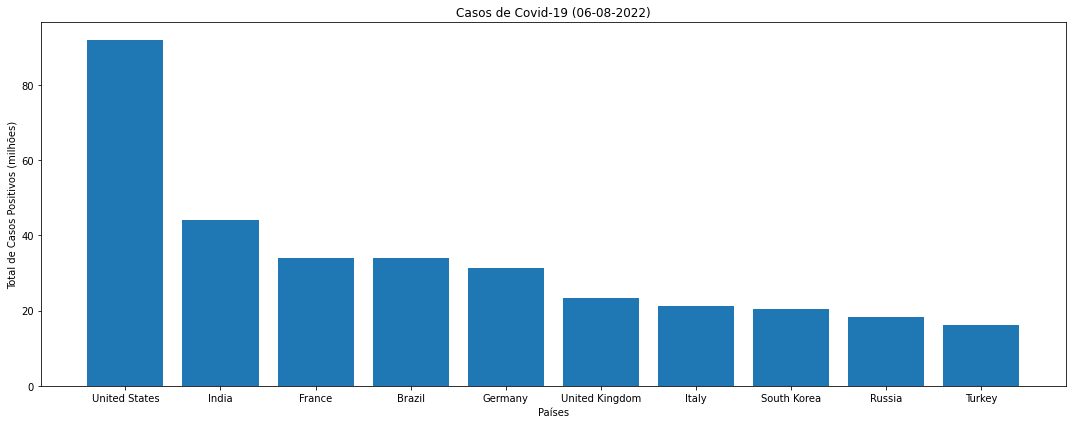

In [120]:
#países com maior total_cases
top10_total_cases = df_paises[['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[0:10]

#convertendo unidade para milhões
top10_total_cases.total_cases = top10_total_cases.total_cases / 1000000

#plotar um gráfico com o ranking
fig, ax = plt.subplots(figsize=(15,6))

ax.bar('location', 'total_cases', data=top10_total_cases)

ax.set_title("Casos de Covid-19 (06-08-2022)")
ax.set_ylabel("Total de Casos Positivos (milhões)")
ax.set_xlabel("Países")

plt.tight_layout()

Esse não é um ranking que gostaríamos de ver nosso país, não é verdade?

Mas, infelizmente, o Brasil aparece em 4ª posição (até essa data) de países com maior número de casos registrados do Covid-19. O que nos chama a atenção aqui, é a diferença entre o primeiro (Estados Unidos) e os demais países.

E como está esse cenário para os registros de mortes?

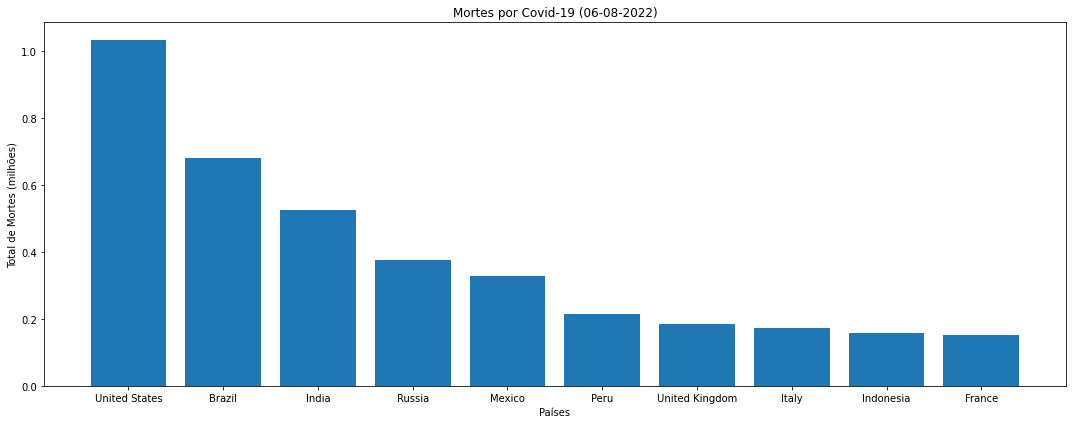

In [121]:
#países com maior total_deaths
top10_total_deaths = df_paises[['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[0:10]

#convertendo unidade para milhões
top10_total_deaths.total_deaths = top10_total_deaths.total_deaths / 1000000

#plotar um gráfico com o ranking
fig, ax = plt.subplots(figsize=(15,6))

ax.bar('location', 'total_deaths', data=top10_total_deaths)

ax.set_title("Mortes por Covid-19 (06-08-2022)")
ax.set_ylabel("Total de Mortes (milhões)")
ax.set_xlabel("Países")


plt.tight_layout()

Mais uma vez o Brasil aparecendo no ranking, agora em segundo lugar, com mais mortes por Covid-19 registradas entre os países do globo.

É interessanter perceber também que os países Alemanha (Germany), Korea do Sul (South Korea) e Turquia (Turkey) estão no o top 10 para casos, mas não estão no raking de mais mortes.

Já no ranking de mais mortes apareceram o México (Mexico), Peru (Peru) e Indonésia (Indonesia), que não estão entre os top 10 com mais casos de covid.

###Como está a evolução do Covid-19 no mundo?

Nosso *dataset* trás informações globais dos casos de Covid-19. Vou plotar um gráfico para saber como está essa evolução até o momento.

In [122]:
#criar dataframe apenas com dado mundial acumulado (World)
df_world = df_clean.loc[df_clean.iso_code == "OWID_WRL"].copy()

In [123]:
#verificar se existem valores ausentes em total_cases
df_world.total_cases.isnull().sum()

0

Inicialmente vemos que não temos valores ausentes para tratar nos registros *World*, variável `total_cases`.


Como o *DataFrame* utilizado é atualizado diariamente e estou fazendo um split apenas com as entradas de *World*, vou definir a variável `date` como o index.

In [124]:
#definindo novo index para dataframe
df_world.index = df_world.date

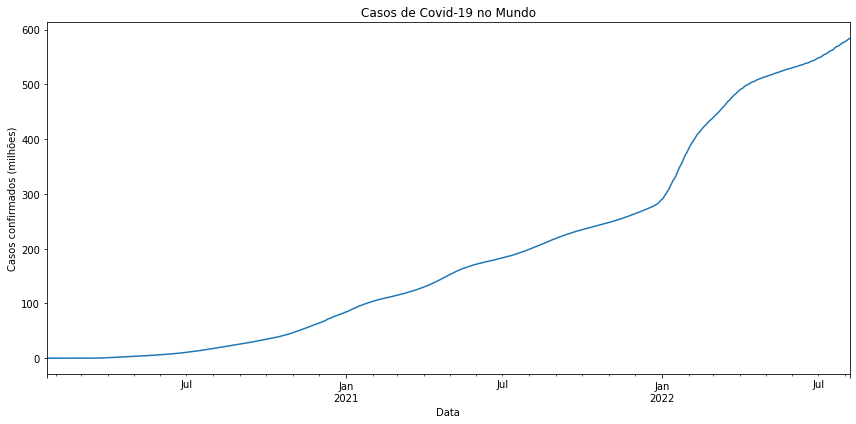

In [125]:
#from pandas.core.dtypes.cast import convert_scalar_for_putitemlike

#plotar o número de casos confirmados
fig, ax = plt.subplots(figsize=(12,6)) #criando duas variáveis

(df_world['total_cases'] / 1000000).plot(kind="line", ax=ax)
ax.set_title("Casos de Covid-19 no Mundo")
ax.set_ylabel("Casos confirmados (milhões)")
ax.set_xlabel("Data")


plt.tight_layout() #em alguns casos ele ajusta o gráfico na tela

Aqui percebemos que no ínicio do ano de 2022 tivemos picos de crescimento de casos do covid no mundo.

###Como foi o crescimento dos casos de Covid-19 nos países que mais tem casos registrados?

Os dados compilados e fornecidos pela OWiD tem a primeira entrada do dia 01/01/2020. Desde essa data os dados foram coletados, consolidados e distribuidos publicamente, diariamente.

Para percebermos a história da pandemia nesses últimos anos, vou plotar um "Bar Chart Race" para alguns países que irei definir a seguir. Nesse gráfico, irei plotar os dados de casos de Covid-19.

In [126]:
#primeira data registrada no dataframe
df.date.min()

'2020-01-01'

O nosso *DataFrame*, como citado anteriormente, possui a listagem de 229 países. A biblioteca do *Bar Chart Race* não demonstrou capacidade de compilar o gráfico para todos os países, por isso, vou eleger 10 países que possuem mais casos de covid na data atual para nossa visualização.

Esses "top 10" já foi identificado no tópico anterior, registrado no *DataFrame* `top10_total_cases`. Serão esses países que irei aplicar.

In [127]:
#lista dos 10 países com mais casos
top10_total_cases

location  total_cases
195846   United States    92.102659
86185            India    44.145709
66155           France    34.086302
26662           Brazil    34.011173
70597          Germany    31.228314
194918  United Kingdom    23.457428
93358            Italy    21.286771
173765     South Korea    20.489128
154512          Russia    18.420288
189744          Turkey    16.295817

In [128]:
#definindo a lista de países
values  = ["United States",
           "India",
           "France",
           "Brazil", 
           "Germany", 
           "United Kingdon", 
           "Italy", 
           "South Korea", 
           "Russia", 
           "Turkey"]

#criando dataframe com os países eleitos
df_cases_paises = df_clean[df_clean.location.isin(values)].copy()

#verificar tamanho do dataframe
print("\nEntradas do dataframe: \t{}".format(df_cases_paises.shape[0]),
      "\nVariáveis do dataframe: {}".format(df_cases_paises.shape[1]))


Entradas do dataframe: 	8235 
Variáveis do dataframe: 61


Para gerar um "Bar Chart Race" precisamos de um *DataFrame* com uma estrutura padronizada. Vou definí-lo apenas com as variáveis necessárias: `date`, `location` e `total_cases`.

In [129]:
#criar dataframe apenas com países
df_cases_paises = df_cases_paises[['date', 'location', 'total_cases']].sort_values(by='date', ascending=True)

#verificar tamanho do dataframe
print("\nEntradas do dataframe: \t{}".format(df_cases_paises.shape[0]),
      "\nVariáveis do dataframe: {}".format(df_cases_paises.shape[1]))


Entradas do dataframe: 	8235 
Variáveis do dataframe: 3


In [130]:
#visualizar entradas do dataframe
df_cases_paises.head()

date       location  total_cases
172838 2020-01-22    South Korea          1.0
194919 2020-01-22  United States          1.0
172839 2020-01-23    South Korea          1.0
194920 2020-01-23  United States          1.0
172840 2020-01-24    South Korea          2.0

Agora preciso reestruturar o *DataFrame* em uma tabela com as entradas listadas por data e nas colunas (variáveis) os países. Vou fazer isso a partir da função `pivot_table`, do pandas.

In [131]:
#criando tabela reestruturada
df_pivot_table = pd.pivot_table(df_cases_paises, values=['total_cases'], index=['date'], columns=['location'], aggfunc=np.sum)

#visualizar tabela
df_pivot_table.head()

total_cases                                                       \
location        Brazil France Germany India Italy Russia South Korea Turkey   
date                                                                          
2020-01-22         NaN    NaN     NaN   NaN   NaN    NaN         1.0    NaN   
2020-01-23         NaN    NaN     NaN   NaN   NaN    NaN         1.0    NaN   
2020-01-24         NaN    2.0     NaN   NaN   NaN    NaN         2.0    NaN   
2020-01-25         NaN    3.0     NaN   NaN   NaN    NaN         2.0    NaN   
2020-01-26         NaN    3.0     NaN   NaN   NaN    NaN         3.0    NaN   

                          
location   United States  
date                      
2020-01-22           1.0  
2020-01-23           1.0  
2020-01-24           2.0  
2020-01-25           2.0  
2020-01-26           5.0

Agora, preciso converter a *pivot table* em um *DataFrame*, para poder manipular os dados.

In [132]:
#converter pivot tablem em um dataframe
df_table = df_pivot_table

df_table.columns = df_table.columns.droplevel(0)
df_table.columns.name = None

#visualizar as primeiras entradas
df_table.head()

Brazil  France  Germany  India  Italy  Russia  South Korea  \
date                                                                     
2020-01-22     NaN     NaN      NaN    NaN    NaN     NaN          1.0   
2020-01-23     NaN     NaN      NaN    NaN    NaN     NaN          1.0   
2020-01-24     NaN     2.0      NaN    NaN    NaN     NaN          2.0   
2020-01-25     NaN     3.0      NaN    NaN    NaN     NaN          2.0   
2020-01-26     NaN     3.0      NaN    NaN    NaN     NaN          3.0   

            Turkey  United States  
date                               
2020-01-22     NaN            1.0  
2020-01-23     NaN            1.0  
2020-01-24     NaN            2.0  
2020-01-25     NaN            2.0  
2020-01-26     NaN            5.0

Como vimos nas duas tabelas acima, nosso *DataFrame* possui valores ausentes. De acordo com a documentação do nosso *dataset* original (fornececido pela OWiD), em certas datas os dados podem não ter sido divulgados pelos países ou não eram medidos naquele momento.

**Tratando os valores ausentes**

Vamos primeiro entender quantos são os valores ausentes no nosso *dataframe*.

In [133]:
#identificando valores ausentes.
(df_table.isnull().sum()/ df_table.shape[0]).sort_values(ascending = False)

Turkey           0.052802
Brazil           0.037716
Italy            0.009698
Russia           0.009698
India            0.008621
Germany          0.005388
France           0.002155
South Korea      0.000000
United States    0.000000
dtype: float64

Vejam que os valores ausentes não chegam nem a 1% em alguns países e outros ficam abaixo ainda de 0.5%. 

Vou tomar como medida, excluir as entradas com pelo menos 1 valor ausente. Como o percentual de valores é pequeno, o impacto nos dados de nosso *DataFrame* não irá trazer prejuízos para nossa visualização. Também já irei deixar o *DataFrame* ordenado por data em ordem crescente, pois precisarei dessa característica mais adiante.

In [134]:
#excluir entradas com pelo menos 1 valor ausente
df_table2 = df_table.dropna().sort_values(by = 'date', ascending = True)

#verificar tamanho do dataframe
print("\nEntradas do dataframe antes: \t{}".format(df_table.shape[0]),
      "\nEntradas do dataframe depois: \t{}".format(df_table2.shape[0]))


Entradas do dataframe antes: 	928 
Entradas do dataframe depois: 	879


Em nosso *DataFrame* permanecem ainda 879 entradas de registros diários destes mais de 2 anos de pandemia. Se eu tentasse plotar um "Bar Char Race" com esses dados, teríamos uma visualização muito longa da evolução mostrada no gráfico e certamente a leitura e a interpretação ficarão prejudicados. 

Portanto, vou reduzir o nosso *dataset* para registros semanais, mantendo a primeira data de cada semana que ainda temos.

In [135]:
#criar uma cópia do dataframe
df_table3 = df_table2.copy()

#inserir nova coluna para Month (Mês)
df_table3.insert(9, "Week", pd.DatetimeIndex(df_table3.index).week, True)

#inserir nova coluna para identificar quando o mês se altera
df_table3.insert(10, "Week_Diff", df_table3.Week.diff(), True)

#visualizar primeiras entradas
df_table3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


Brazil  France  Germany  India    Italy  Russia  South Korea  \
date                                                                       
2020-03-11    38.0  2293.0   1567.0   62.0  12462.0    20.0       7755.0   
2020-03-12    52.0  2293.0   2369.0   73.0  15113.0    28.0       7869.0   
2020-03-13   151.0  3678.0   3062.0   82.0  17660.0    45.0       7979.0   
2020-03-14   151.0  4493.0   3795.0  102.0  21157.0    59.0       8086.0   
2020-03-15   162.0  4529.0   4838.0  113.0  24747.0    63.0       8162.0   

            Turkey  United States  Week  Week_Diff  
date                                                
2020-03-11     1.0         1147.0    11        NaN  
2020-03-12     1.0         1586.0    11        0.0  
2020-03-13     5.0         2219.0    11        0.0  
2020-03-14     5.0         2978.0    11        0.0  
2020-03-15     6.0         3212.0    11        0.0

Agora, na virada de cada semana o valor mostrado na variável `Week_Diff` será maior que 1. Todos os registros que forem igual a 0 (zero) poderei excluir.

In [136]:
#reduzindo tamanho do dataframe
df_table3.drop(df_table3.loc[df_table3.Week_Diff==0].index, inplace=True)

#verificar tamanho do dataframe
print("\nEntradas do dataframe antes: \t{}".format(df_table2.shape[0]),
      "\nEntradas do dataframe depois: \t{}".format(df_table3.shape[0]))


Entradas do dataframe antes: 	879 
Entradas do dataframe depois: 	126


Nosso *DataFrame* foi reduzido de 879 entradas para apenas 126 registros semanais. Agora vou excluir as colunas desenecessárias para plotar o "Bar Char Race".

In [137]:
#excluir variáves Month e Month_Diff
df_table3.drop(['Week', 'Week_Diff'], axis=1, inplace=True)

#visualizar primeiras entradas
df_table3.head()

Brazil   France  Germany   India     Italy  Russia  South Korea  \
date                                                                           
2020-03-11     38.0   2293.0   1567.0    62.0   12462.0    20.0       7755.0   
2020-03-16    200.0   6680.0   6012.0   119.0   27980.0    90.0       8236.0   
2020-03-23   1924.0  20094.0  22672.0   499.0   63927.0   438.0       8961.0   
2020-03-30   4579.0  44594.0  57298.0  1251.0  101739.0  1836.0       9661.0   
2020-04-06  12161.0  50823.0  95391.0  4778.0  132547.0  6343.0      10284.0   

             Turkey  United States  
date                                
2020-03-11      1.0         1147.0  
2020-03-16     18.0         4679.0  
2020-03-23   1529.0        46096.0  
2020-03-30  10827.0       165698.0  
2020-04-06  30217.0       380798.0

Com nossos dados formatados, podemos então criar um "Bar Chart Race". Vejamos:

In [138]:
# plotando o gráfico
bcr.bar_chart_race(df=df_table3, filename=None)

Aqui um ponto bem interessante é ver que a Korea do Sul (South Korea) até esse ano de 2022 tinha milhares de casos a menos que os demais países, porém, quando os casos por lá começaram a aumentar, tomou uma proporção grande bem rápido.

##O Covid-19 no Brasil

Vou realizar uma análise exploratória para o Brasil, buscando mostrar algumas características da pandemia no país.

###Quando foi registrado a primeira morte?

Sabendo que os dados fornecidos são acumulativos dia a dia, vou tomar como premissa que a primeira morte foi registrada no dia que temos o menor número de mortes em `total_deaths`.



In [139]:
#criando novo dataframe para o Brasil
df_brasil = df_clean.loc[df_clean.location == "Brazil"].copy()

#mostrando o tamanho do dataframe
df_brasil.shape

(893, 61)

In [140]:
#identificar primeiro registro de morte
df_brasil.loc[df_brasil.total_deaths == df_brasil.total_deaths.min()].date

25790   2020-03-17
Name: date, dtype: datetime64[ns]

O primeiro caso de morte no Brasil foi registrado no dia 17/03/2020.

###Quando foi registrado o primeiro caso de Covid-19 no Brasil?

Partirei da mesma premissa da análise anterior, considerando que o primeiro caso está registrado na data que possui o menor número de casos positivos de Covid-19.

In [141]:
#identificar primeiro registro de casos
df_brasil.loc[df_brasil.total_cases == df_brasil.total_cases.min()].date

25770   2020-02-26
25771   2020-02-27
25772   2020-02-28
Name: date, dtype: datetime64[ns]

Temos 3 datas consecutivas com o mesmo "menor número de casos" no mês de fevereiro de 2020. Concluímos então que o primeiro caso de covid foi registrado no dia 26/02/2020. 
Nessa data, era quarta-feira de cinzas daquele ano. 

O primeiro registro de Covid-19 no Brasil aconteceu no carnaval de 2020. Ainda não havia lockdown no país nesse período.

In [142]:
#dias entre primeiro caso e primeira morte
prim_morte = df_brasil.loc[df_brasil.total_deaths == df_brasil.total_deaths.min()].date
prim_caso = df_brasil.loc[df_brasil.total_cases == df_brasil.total_cases.min()].date.min()

prim_morte - prim_caso

25790   20 days
Name: date, dtype: timedelta64[ns]

Foram 20 dias entre o registro de primeiro caso de Covid-19 no Brasil e o registro da primeira morte.

###Como foi o crescimento dos casos e mortes no Brasil?

Vou plotar gráficos em escala linear e logarítmica para visualizarmos a evolução no Brasil ao longo da pandemia.

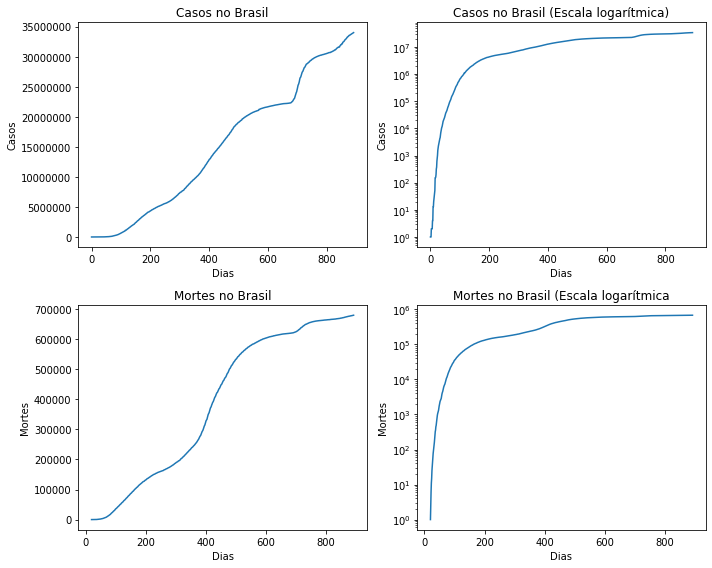

In [143]:
# Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.
x = list(range(df_brasil.shape[0]))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.ticklabel_format(useOffset=False, style='plain')
ax1.plot(x, z)


ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala logarítmica')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z2)

plt.tight_layout()

###Como estão os novos casos e novas mortes nos últimos 30 dias?

Para entendermos se a pandemia tem diminuido o seu ritmo no país, vou explorar os dados dos últimos 30 dias registrados.

In [144]:
#criando novo dataframe últimos 30 dias
df_brasil_30 = df_brasil.tail(30).copy()

#média de novos casos 
media_casos = df_brasil_30.new_cases.mean()

#média de novas mortes
media_mortes = df_brasil_30.new_deaths.mean()

print("\nMédia de novos casos nos últimos 30 dias: \t{:.0f} novos casos".format(media_casos),
      "\nMédia de novas mortes nos últimos 30 dias: \t{:.0f} novas mortes".format(media_mortes))


Média de novos casos nos últimos 30 dias: 	41715 novos casos 
Média de novas mortes nos últimos 30 dias: 	229 novas mortes


A média de 41 mil novos casos por dia no país impressiona. Vou buscar qual foi o maior pico que tivemos de registros no país.

In [145]:
#maior registro de novos casos
maior_casos = df_brasil.new_cases.max()

#data maior registro de novos casos
data_maior_casos = df_brasil.loc[df_brasil.new_cases == maior_casos, 'date'].values[0]

print("\nMaior registro de novos casos em um único dia: \t{:.0f} novos casos".format(maior_casos),
      "\nEsse registro aconteceu no dia {}" .format(data_maior_casos))


Maior registro de novos casos em um único dia: 	287149 novos casos 
Esse registro aconteceu no dia 2022-02-03T00:00:00.000000000


Vemos que o pico de registro de novos casos em um único dia aconteceu nesse ano de 2022.

#Conclusão

Como citei no início do desse projeto, os dados são atualizados diariamente, então, essa análise pode se tornar obsoleta rapidamente. 

Durante nossa breve análise, digo breve pois não explorei todas as 64 variáveis disponíveis, pudemos entender melhor a dimensão da pandemia no Brasil e no Mundo.

O Brasil, está no top entre os países com mais casos e mais mortes. Porém, também vimos que não há uma relação direta esses números, pois países listados entre os com "mais mortes" não estão entre os com "mais casos".

A pandemia já está presente no mundo pelo terceiro ano consecutivo. Esse ano de 2022 tem sido importante para muitos países, como a Korea do Sul, que teve uma crescente de casos muito grande em um poucos meses. Também para o Brasil que teve o record de registro de casos em um único dia (287 mil casos registrados na quinta-feira de 03/02/2022).

No Brasil, ainda temos muitos casos registrados no Brasil diariamente.

Por fim, essa análise exploratória mostrou que a pandemia ainda faz parte do cenário global e nacional, e deixa uma mensagem implícita de que devemos ainda dar atenção aos efeitos causados pelo Corona Vírus.